![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

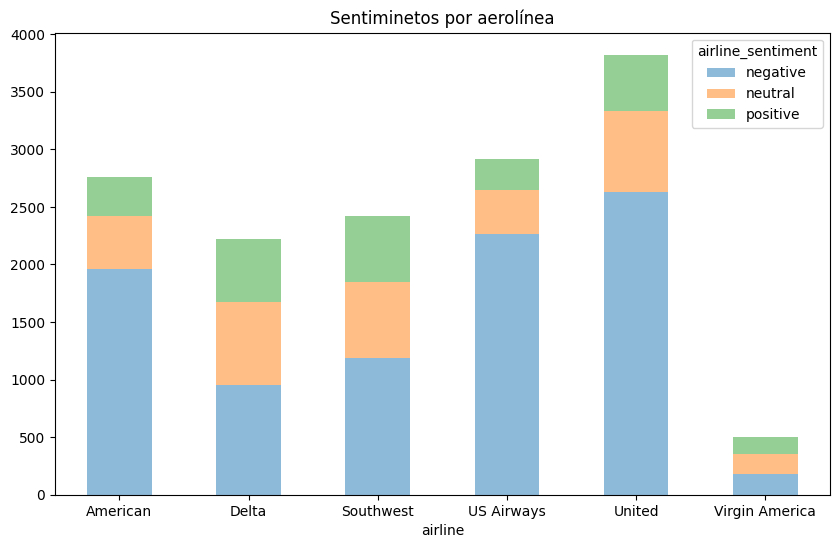

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score
import time

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

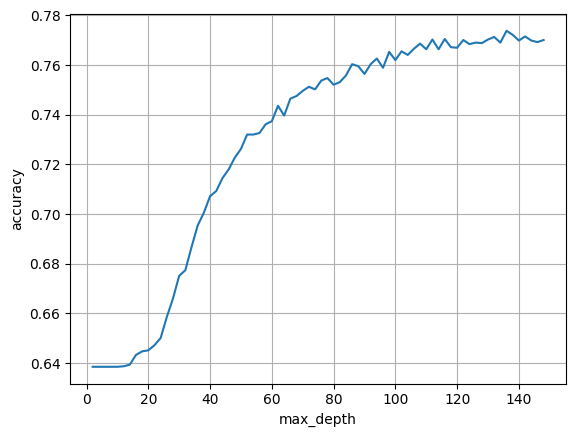

El accuracy para CountVectorizer es de: 0.7737996688741722
La mejor profundidad para el modelo es: 136 de profundidad


In [13]:
# Celda 1
index_results = ['CountVectorizer', 'Sin Stopwords', 'Lematización', 'Múltiples técnicas']
results = pd.DataFrame(index=index_results, columns=['Accuracy','Tiempo computacional', 'Profundidad'])
results.index.name = 'Técnicas'

max_depth_range = range(2, 150, 2)

# Función para calibrar random forest
def calibrar_rf(X_train, y_train, X_test, y_test, max_depth):
    rf = RandomForestClassifier(max_depth=max_depth, random_state=123, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Creación de un modelo random forest para predecir el sentimiento de los tweets
t_inicial = time.time()
c_vectorizer = CountVectorizer()
X_dtm_train = c_vectorizer.fit_transform(X_train)
X_dtm_test = c_vectorizer.transform(X_test)

# Calibración del modelo random forest
acc_scores = []

# Calibración de profundidad del modelo random forest
acc_scores.clear()
for depth in max_depth_range:
    accuracy = calibrar_rf(X_dtm_train, y_train, X_dtm_test, y_test, depth)
    acc_scores.append(accuracy)

# Mejor profundidad
best_acc = max(acc_scores)
best_index = acc_scores.index(best_acc)
best_max_depth = max_depth_range[best_index]
t_final = time.time()

t_total = t_final - t_inicial

# Graficar accuracy vs profundidad
plt.plot(max_depth_range, acc_scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()

# Calibración de random forest con CountVectorizer
accuracy = calibrar_rf(X_dtm_train, y_train, X_dtm_test, y_test, best_max_depth)
results.loc['CountVectorizer', 'Accuracy'] = accuracy
results.loc['CountVectorizer', 'Tiempo computacional'] = t_total
results.loc['CountVectorizer', 'Profundidad'] = best_max_depth
print(f'El accuracy para CountVectorizer es de: {accuracy}')
print(f'La mejor profundidad para el modelo es: {best_max_depth} de profundidad')


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

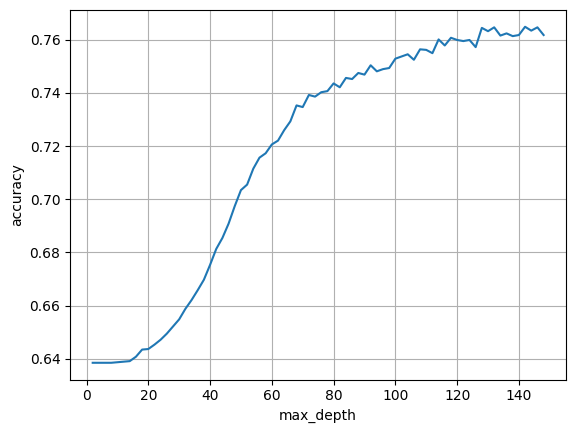

El accuracy para CountVectorizer sin stopwords es de: 0.7649006622516556
La mejor profundidad para el modelo es: 142 de profundidad


In [14]:
# Celda 2
# Definición del modelo sin stopwords
t_inicial = time.time()
vect_no_sw = CountVectorizer(stop_words='english')
X_no_sw_train = vect_no_sw.fit_transform(X_train)
X_no_sw_test = vect_no_sw.transform(X_test)

# Calibración de la profundidad para random forest
acc_scores.clear()
for depth in max_depth_range:
    accuracy = calibrar_rf(X_no_sw_train, y_train, X_no_sw_test, y_test, depth)
    acc_scores.append(accuracy)

# Mejor profundidad
best_acc = max(acc_scores)
best_index = acc_scores.index(best_acc)
best_max_depth = max_depth_range[best_index]
t_final = time.time()
t_total = t_final - t_inicial

# Graficar accuracy vs profundidad
plt.plot(max_depth_range, acc_scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()

# Calibración de random forest con CountVectorizer sin stopwords
accuracy = calibrar_rf(X_no_sw_train, y_train, X_no_sw_test, y_test, best_max_depth)
results.loc['Sin Stopwords', 'Accuracy'] = accuracy
results.loc['Sin Stopwords', 'Tiempo computacional'] = t_total
results.loc['Sin Stopwords', 'Profundidad'] = best_max_depth
print(f'El accuracy para CountVectorizer sin stopwords es de: {accuracy}')
print(f'La mejor profundidad para el modelo es: {best_max_depth} de profundidad')

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DROZOISAZA\AppData\Roaming\nltk_data...
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DROZOISAZA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


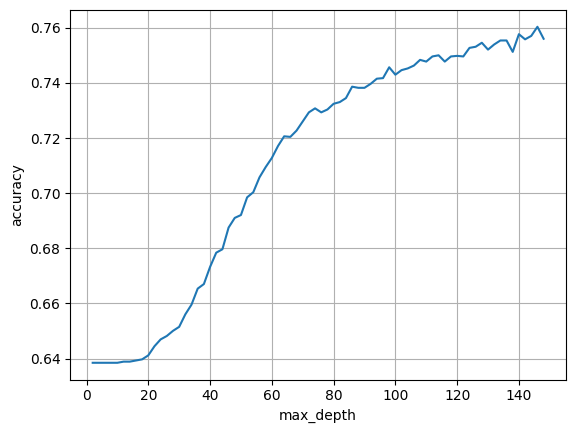

El accuracy para CountVectorizer con lematización es de: 0.7603476821192053
La mejor profundidad para el modelo es: 146 de profundidad


In [15]:
# Celda 3
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

# Definición de función para lematización
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

# Definición del modelo con lematización
t_inicial = time.time()
vect = CountVectorizer(analyzer=split_into_lemmas)
X_dtm_train = vect.fit_transform(X_train)
X_dtm_test = vect.transform(X_test)

# Calibración del modelo random forest
acc_scores.clear()

for depth in max_depth_range:
    accuracy = calibrar_rf(X_dtm_train, y_train, X_dtm_test, y_test, depth)
    acc_scores.append(accuracy)
    #print(f'El accuracy para {depth} de profundidad es de: {accuracy}')

# Mejor profundidad
best_acc = max(acc_scores)
best_index = acc_scores.index(best_acc)
best_max_depth = max_depth_range[best_index]
t_final = time.time()
t_total = t_final - t_inicial

# Graficar accuracy vs profundidad
plt.plot(max_depth_range, acc_scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()

# Calibración de random forest con CountVectorizer con lematización
accuracy = calibrar_rf(X_dtm_train, y_train, X_dtm_test, y_test, best_max_depth)
results.loc['Lematización', 'Accuracy'] = accuracy
results.loc['Lematización', 'Tiempo computacional'] = t_total
results.loc['Lematización', 'Profundidad'] = best_max_depth
print(f'El accuracy para CountVectorizer con lematización es de: {accuracy}')
print(f'La mejor profundidad para el modelo es: {best_max_depth} de profundidad')

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

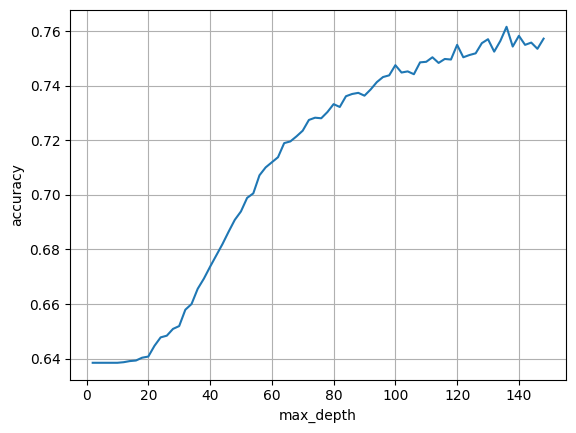

El accuracy para CountVectorizer con múltiples técnicas es de: 0.7615894039735099
La mejor profundidad para el modelo es: 136 de profundidad


In [17]:
# Celda 4
# Definición del modelo con múltiples técnicas
t_inicial = time.time()
vect  = CountVectorizer(binary=True, stop_words='english', analyzer=split_into_lemmas)
X_dtm_train = vect.fit_transform(X_train)
X_dtm_test = vect.transform(X_test)

# Calibración del modelo random forest
acc_scores.clear()

for depth in max_depth_range:
    accuracy = calibrar_rf(X_dtm_train, y_train, X_dtm_test, y_test, depth)
    acc_scores.append(accuracy)

# Mejor profundidad
best_acc = max(acc_scores)
best_index = acc_scores.index(best_acc)
best_max_depth = max_depth_range[best_index]
t_final = time.time()
t_total = t_final - t_inicial

# Graficar accuracy vs profundidad
plt.plot(max_depth_range, acc_scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()

# Calibración de random forest con CountVectorizer con múltiples técnicas
accuracy = calibrar_rf(X_dtm_train, y_train, X_dtm_test, y_test, best_max_depth)
results.loc['Múltiples técnicas', 'Accuracy'] = accuracy
results.loc['Múltiples técnicas', 'Tiempo computacional'] = t_total
results.loc['Múltiples técnicas', 'Profundidad'] = best_max_depth
print(f'El accuracy para CountVectorizer con múltiples técnicas es de: {accuracy}')
print(f'La mejor profundidad para el modelo es: {best_max_depth} de profundidad')

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

,Accuracy,Tiempo computacional,Profundidad
Técnicas,,,
CountVectorizer,0.7738,459.71106,136
Sin Stopwords,0.764901,382.093258,142
Lematización,0.760348,595.456509,146
Múltiples técnicas,0.761589,592.147749,136


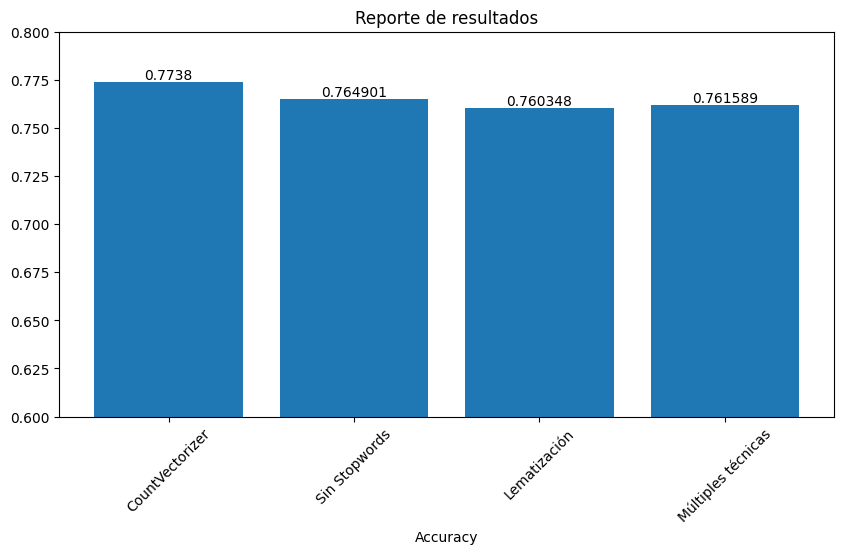

In [20]:
# Celda 5
display(results)

# Graficar resultados
plt.figure(figsize=(10, 5))
plt.bar(results.index, results['Accuracy'])
plt.xticks(rotation=45)
# adicionar datalabels a cada barra
for i, v in enumerate(results['Accuracy']):
    plt.text(i, v, str(round(v, 6)), ha='center', va='bottom')
plt.ylim(0.6, 0.8)
plt.title('Reporte de resultados')
plt.xlabel('Accuracy')
plt.show()

Para este ejercicio en particular, el mejor desempeño lo tuvo el modelo más simple el cual fue CountVectorizer sin acudir a técnicas más avanzadas de remover stopwords o lematización. Adicionalmente, al ser el modelo más sencillo, fue el segundo más rápido en ejecutar la vectorización, cuenta, entrenamiento y predicción de los modelos. Sin embargo, el rendimiento de todos los modelos calibrados es muy similar por lo que para este ejercicio en particular, el CountVectorizer simple es una buena opción.